In [2]:

import numpy as np
import pandas as pd
#Vizualizarea datelor
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore');



In [14]:
#Importam din baza de date
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
          'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']
dataset= pd.read_csv('data_train.csv', names=columns)


In [15]:
#convertim coloana 'label' în clase numerice.
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
dataset['label'] = labelEncoder.fit_transform(dataset['label'])

In [16]:
#Facem acelasi lucru si celelalte tabele
data=dataset[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','label']]

le = preprocessing.LabelEncoder()
for column in data.columns:
    if dataset[column].dtype == type(object):
        dataset[column] = le.fit_transform(dataset[column])

In [17]:
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29305 entries, nan to 8900.0
Data columns (total 15 columns):
age               29305 non-null int32
workclass         29305 non-null object
fnlwgt            29305 non-null int32
education         29305 non-null object
education-num     29305 non-null int32
marital-status    29305 non-null object
occupation        29305 non-null object
relationship      29305 non-null object
race              29305 non-null object
sex               29305 non-null object
capital-gain      29305 non-null int32
capital-loss      29305 non-null int32
hours-per-week    29305 non-null int32
native-country    29305 non-null object
label             29305 non-null int32
dtypes: int32(7), object(8)
memory usage: 2.8+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A7CF115C08>,
      dtype=object)

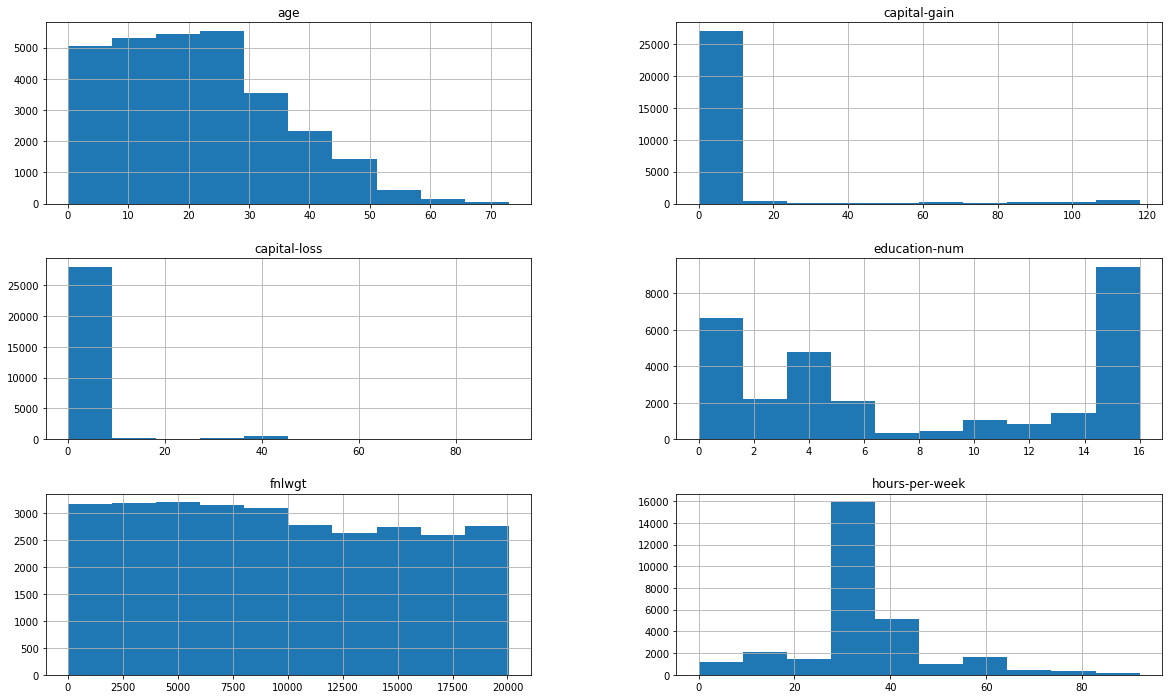

In [18]:
rcParams['figure.figsize'] = 20, 12
dataset[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].hist() 


In [19]:
 # Sunt reprezentate mai sus coloanele numerice. In histogramele de mai sus ,observam ca in ceea ce privește câștigul de capital și pierderea de capital, datele sunt extrem de lăsate.
#Trebuie să analizăm numărul educației în continuare, deoarece ar putea să se alinieze informațiilor despre educație.

In [20]:

data=dataset[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','label']]


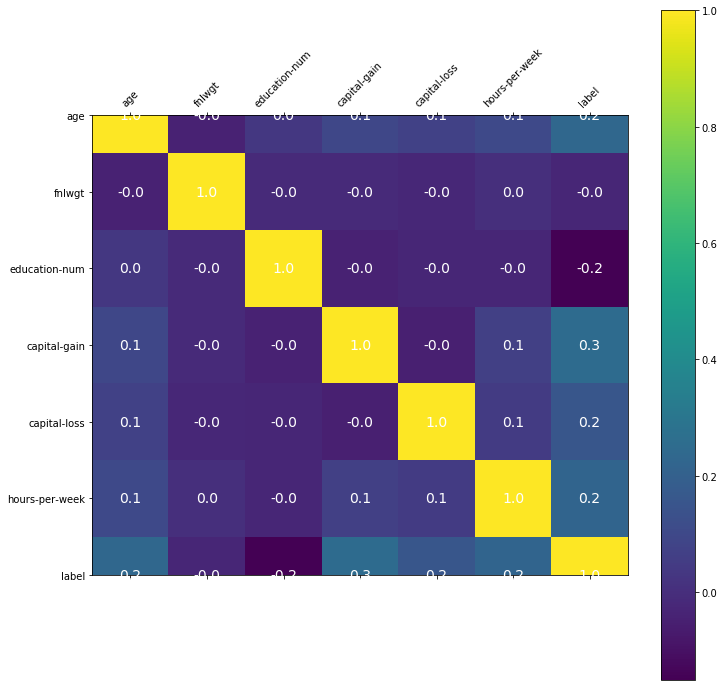

In [21]:
plt.matshow(data.corr())
plt.colorbar()
plt.xticks(np.arange(len(data.corr().columns)), data.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(data.corr().columns)), data.corr().columns.values) 
for (i, j), corr in np.ndenumerate(data.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [22]:
# Am reprezentat matricea de corelatie, care arata ca nu este o corelatie mare intre variabilele coloana 'label'.


In [23]:
#Vom incepe cu coloana 'age'.

#Vom clasifica persoanele in functie de varsta. 

In [24]:
dataset['age'] = pd.cut(dataset['age'], bins = [0, 25, 50, 100], labels = ['tanar', 'adult', 'batran'])


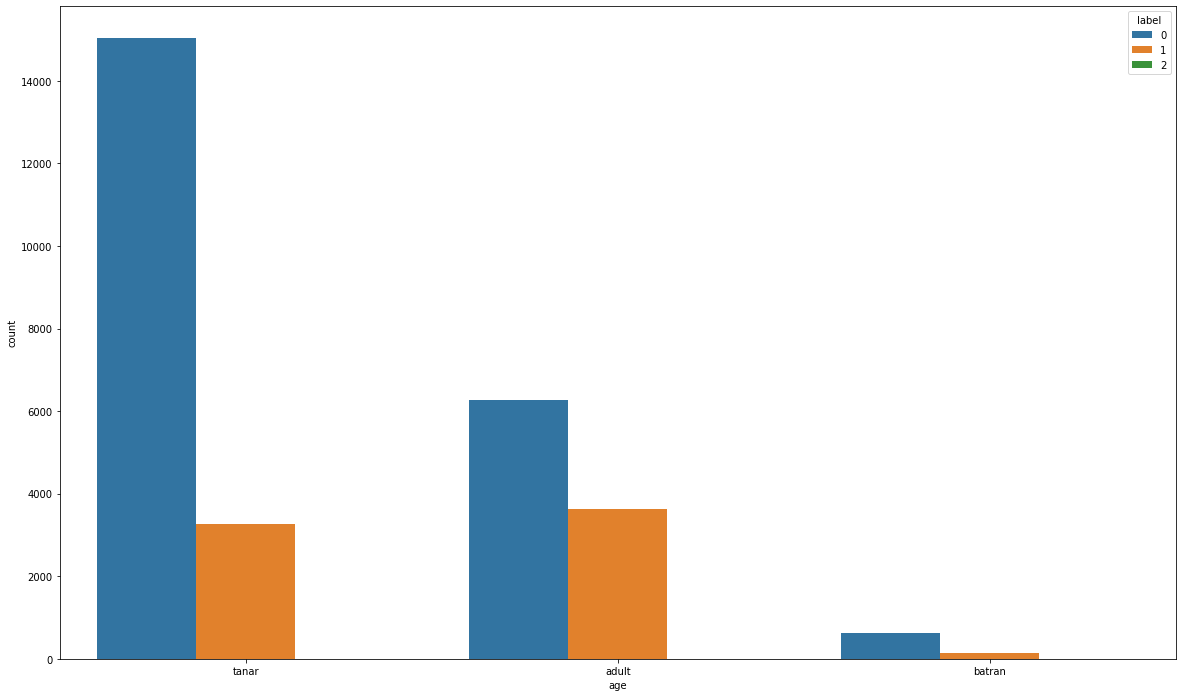

In [25]:
sns.countplot(x = 'age', hue = 'label', data = dataset)


In [18]:
#capital-gain/capital-loss

In [19]:

#Folosim diferenta dintre 'capital-gain' si 'capital-loss'


In [26]:
dataset['capital-diff'] = dataset['capital-gain'] - dataset['capital-loss']
dataset.drop(['capital-gain'], axis = 1, inplace = True)
dataset.drop(['capital-loss'], axis = 1, inplace = True)

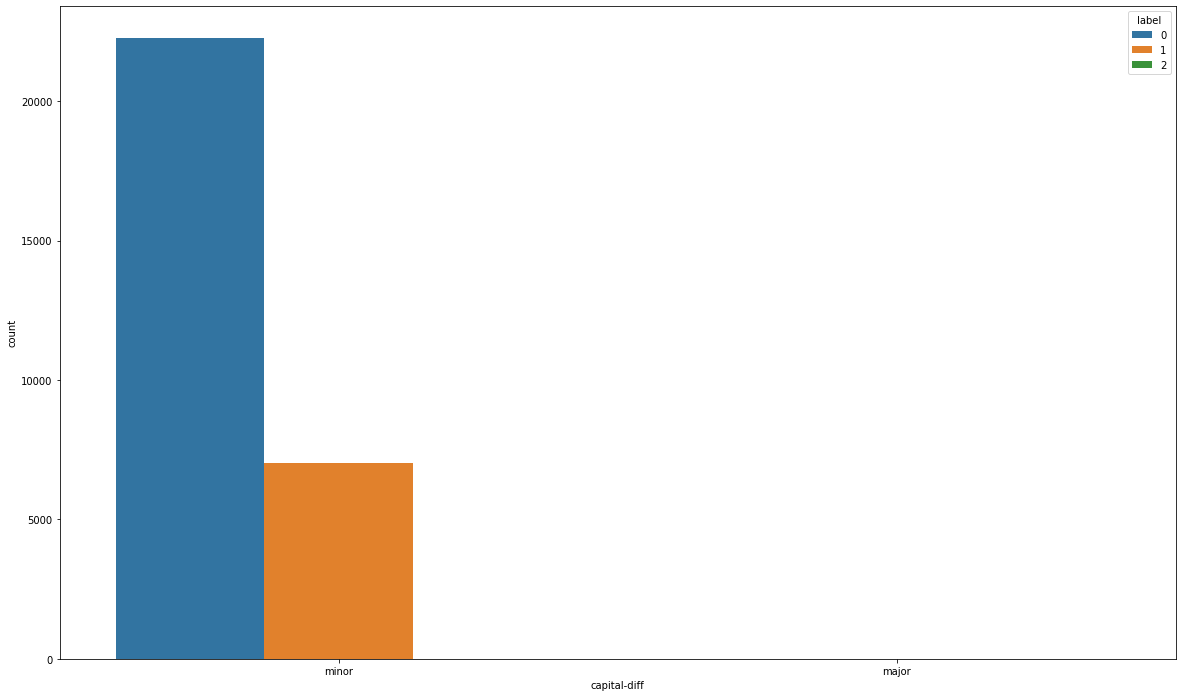

In [27]:
dataset['capital-diff'] = pd.cut(dataset['capital-diff'], bins = [-5000, 5000, 100000], labels = ['minor', 'major'])
sns.countplot(x = 'capital-diff', hue = 'label', data = dataset)

In [22]:
#Pentru persoanele care au varsta (<18ani), sunt mai multe persoane care au mai putin decat 50k.
#Corelatia intre 'fnlwg'  si 'label'nu exista, iar aceasta incarca modelu, din acest motiv o vom scoate .

In [28]:

dataset['hours-per-week'] = pd.cut(dataset['hours-per-week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['inf-ore', 'normal-ore', 'extra-ore'])


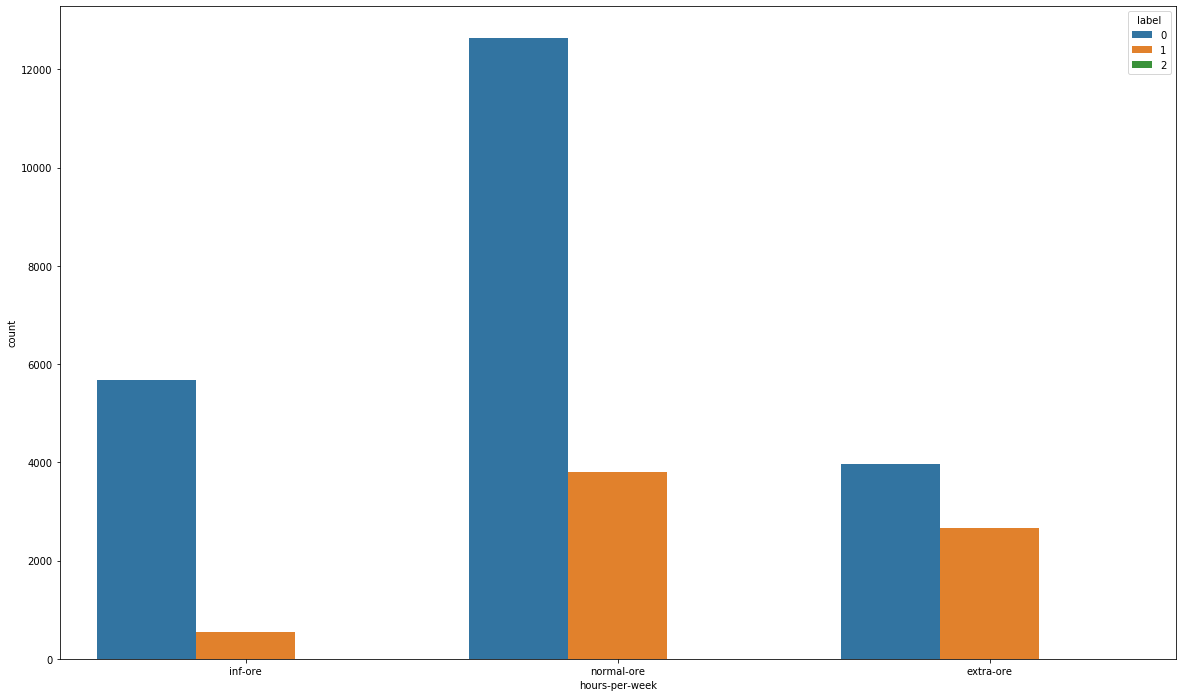

In [29]:
sns.countplot(x = 'hours-per-week', hue = 'label', data = dataset)

In [27]:
#Numarul de ore cu cat creste,cu atat creste si numarul persoanelor care au mai mult de 50K

In [28]:
#'Workclass'


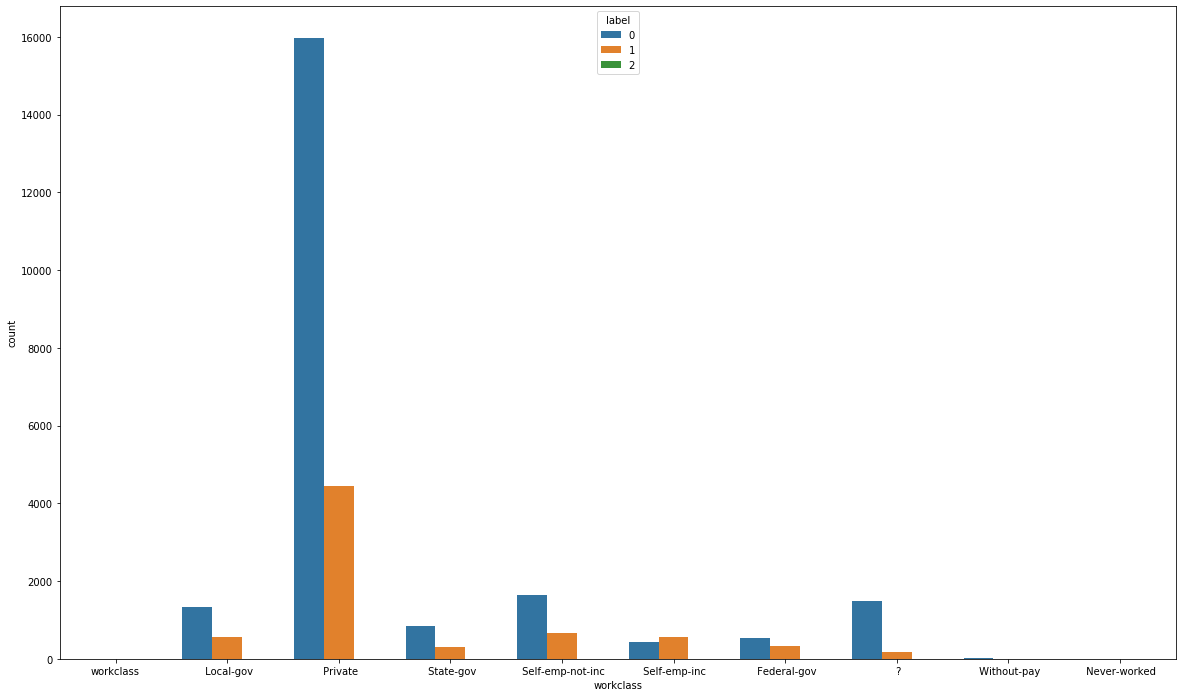

In [30]:
sns.countplot(x = 'workclass', hue = 'label', data = dataset)

In [30]:
# Valorile care lipsesc, le vom sterge.


In [31]:
dataset = dataset.drop(dataset[dataset['workclass'] == ' ?'].index)
dataset = dataset.drop(dataset[dataset['workclass'] == ' Without-pay'].index)
dataset = dataset.drop(dataset[dataset['workclass'] == ' Never-worked'].index)

In [32]:
#Pentru 'education si 'education-num'vom studia legatura dntre ele.

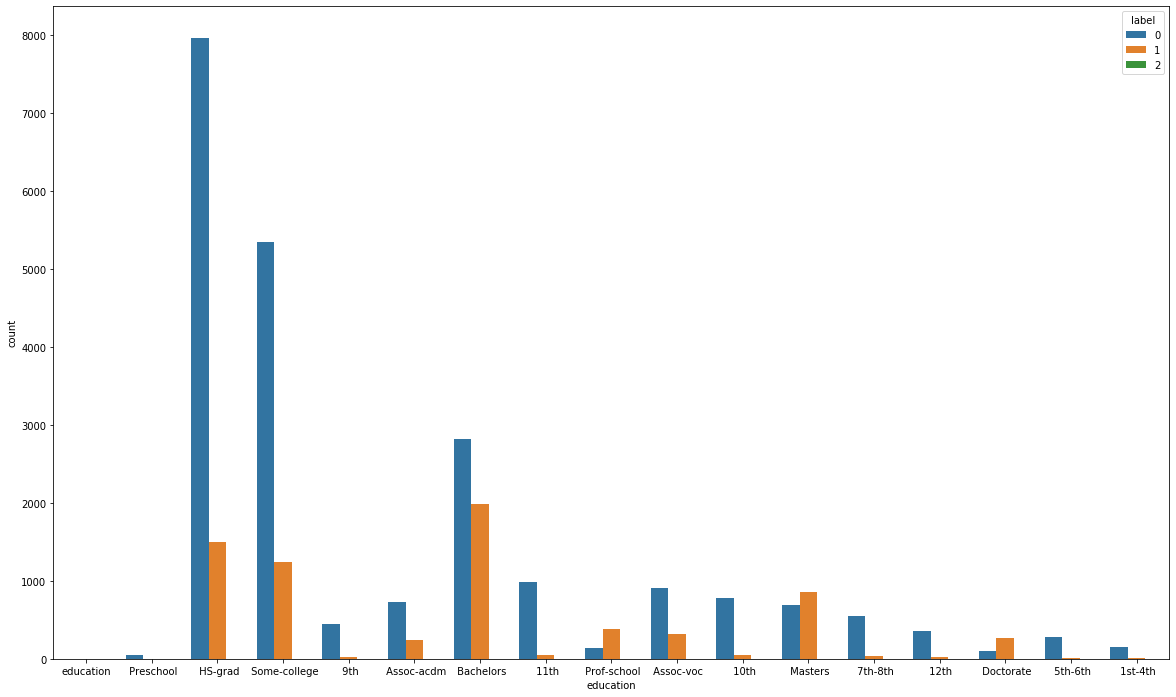

In [31]:
sns.countplot(x = 'education', hue = 'label', data = dataset)

In [32]:
education_classes = dataset['education'].unique()
for edu_class in education_classes:
    print("For {}, the education-num is {}"
          .format(edu_class, dataset[dataset['education'] == edu_class]['education-num'].unique()))

For education, the education-num is [16]
For  Preschool, the education-num is [0]
For  HS-grad, the education-num is [15]
For  Some-college, the education-num is [1]
For  9th, the education-num is [11]
For  Assoc-acdm, the education-num is [3]
For  Bachelors, the education-num is [4]
For  11th, the education-num is [13]
For  Prof-school, the education-num is [6]
For  Assoc-voc, the education-num is [2]
For  10th, the education-num is [12]
For  Masters, the education-num is [5]
For  7th-8th, the education-num is [10]
For  12th, the education-num is [14]
For  Doctorate, the education-num is [7]
For  5th-6th, the education-num is [9]
For  1st-4th, the education-num is [8]


In [33]:
dataset.drop(['education-num'], axis = 1, inplace = True)
dataset['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
dataset['education'].value_counts()

 HS-grad         9468
 Some-college    6580
 Bachelors       4810
 School          3814
 Masters         1556
 Assoc-voc       1228
 Assoc-acdm       963
 Prof-school      518
 Doctorate        367
education           1
Name: education, dtype: int64

In [34]:
#  'marital-status' si 'relationship'.

dataset['marital-status'].value_counts()

 Married-civ-spouse       13432
 Never-married             9671
 Divorced                  3995
 Separated                  919
 Widowed                    894
 Married-spouse-absent      371
 Married-AF-spouse           22
marital-status                1
Name: marital-status, dtype: int64

In [35]:
dataset['relationship'].value_counts()


 Husband           11856
 Not-in-family      7455
 Own-child          4582
 Unmarried          3121
 Wife               1390
 Other-relative      900
relationship           1
Name: relationship, dtype: int64

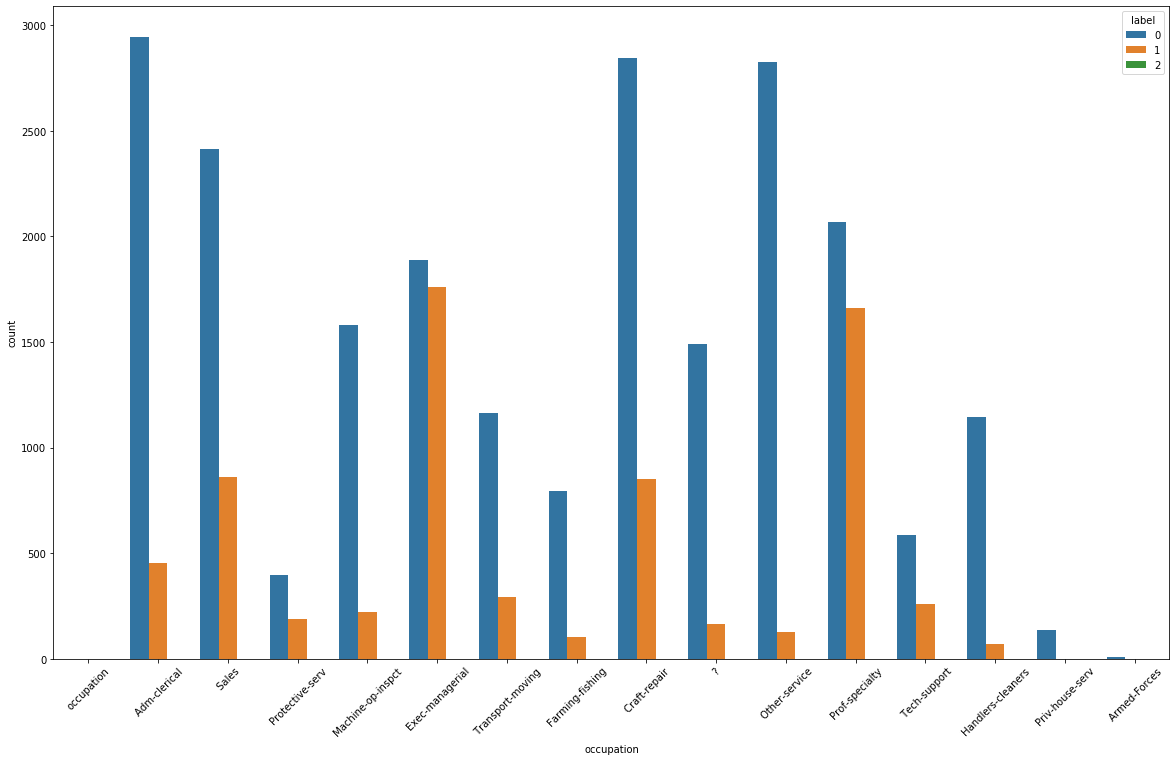

In [37]:
#  'occupation' 
plt.xticks(rotation = 45)
sns.countplot(x = 'occupation', hue = 'label', data = dataset)

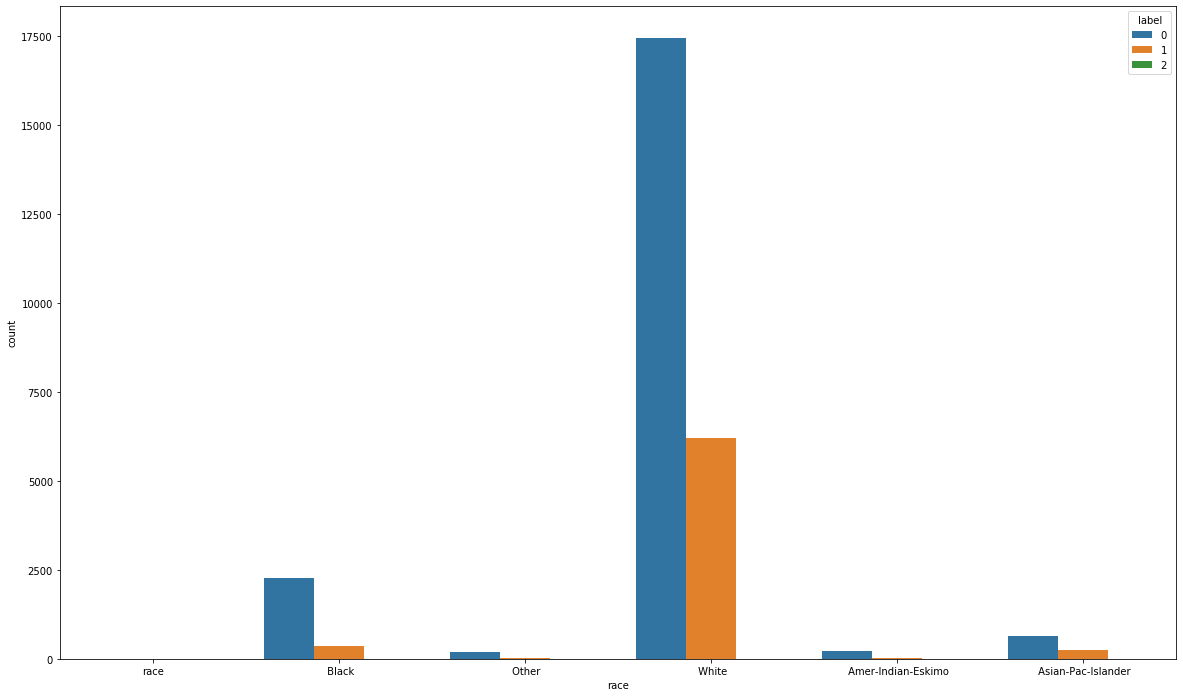

In [39]:
# pentru 'race'

sns.countplot(x = 'race', hue = 'label', data = dataset)

In [38]:
# Se observa ca predomina informatii despre rasa 'White'
dataset['race'].unique()
dataset['race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' other', inplace = True)

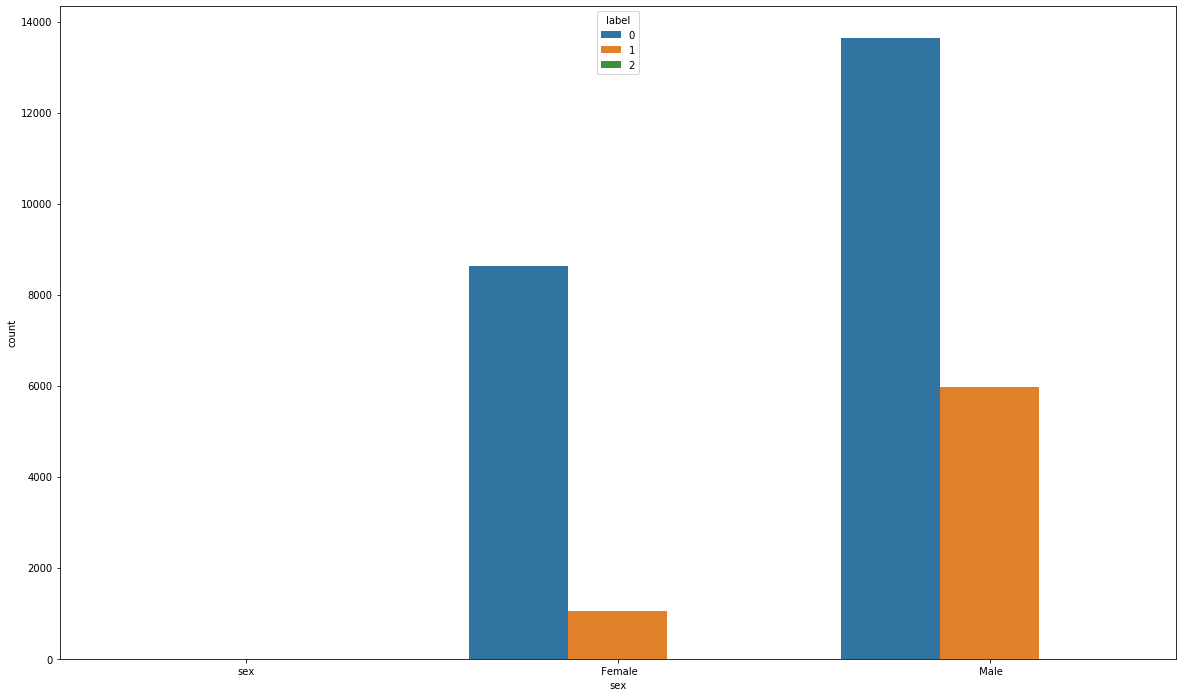

In [39]:
sns.countplot(x = 'sex', hue = 'label', data = dataset)

In [42]:
#Observatie! Numarul barbatilor predomita in numar cat mai mare!

In [40]:
# 'native-country'
country_count = dataset['native-country'].value_counts()
country_count

 United-States                 26263
 Mexico                          571
 ?                               527
 Philippines                     178
 Germany                         128
 Canada                          111
 Puerto-Rico                     103
 El-Salvador                      95
 India                            88
 Cuba                             84
 England                          81
 South                            75
 Jamaica                          69
 Italy                            69
 China                            67
 Dominican-Republic               61
 Guatemala                        60
 Vietnam                          58
 Japan                            56
 Poland                           54
 Columbia                         53
 Taiwan                           48
 Haiti                            42
 Iran                             38
 Portugal                         32
 Nicaragua                        32
 Greece                           27
 

Text(0.5, 1.0, 'Total adults from each Country')

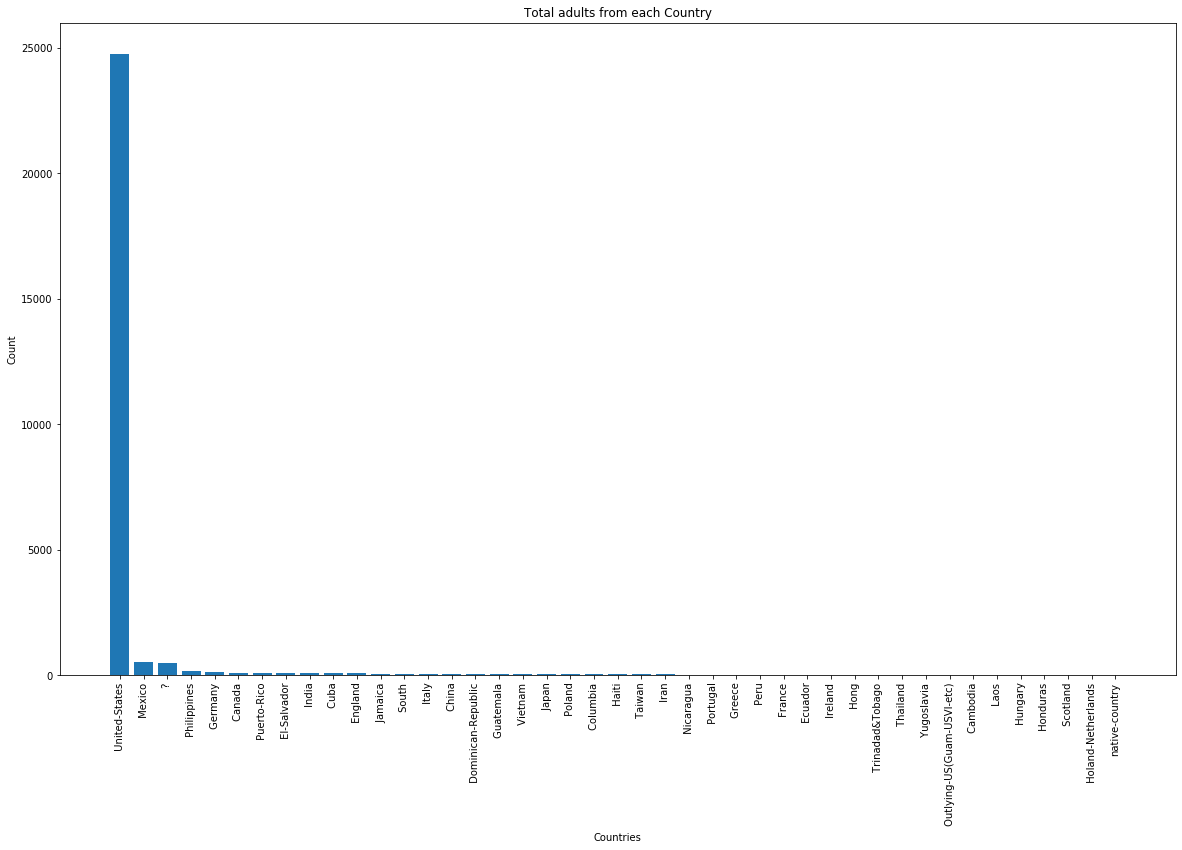

In [44]:

plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

In [41]:
dataset = dataset.drop(dataset[dataset['native-country'] == ' ?'].index)


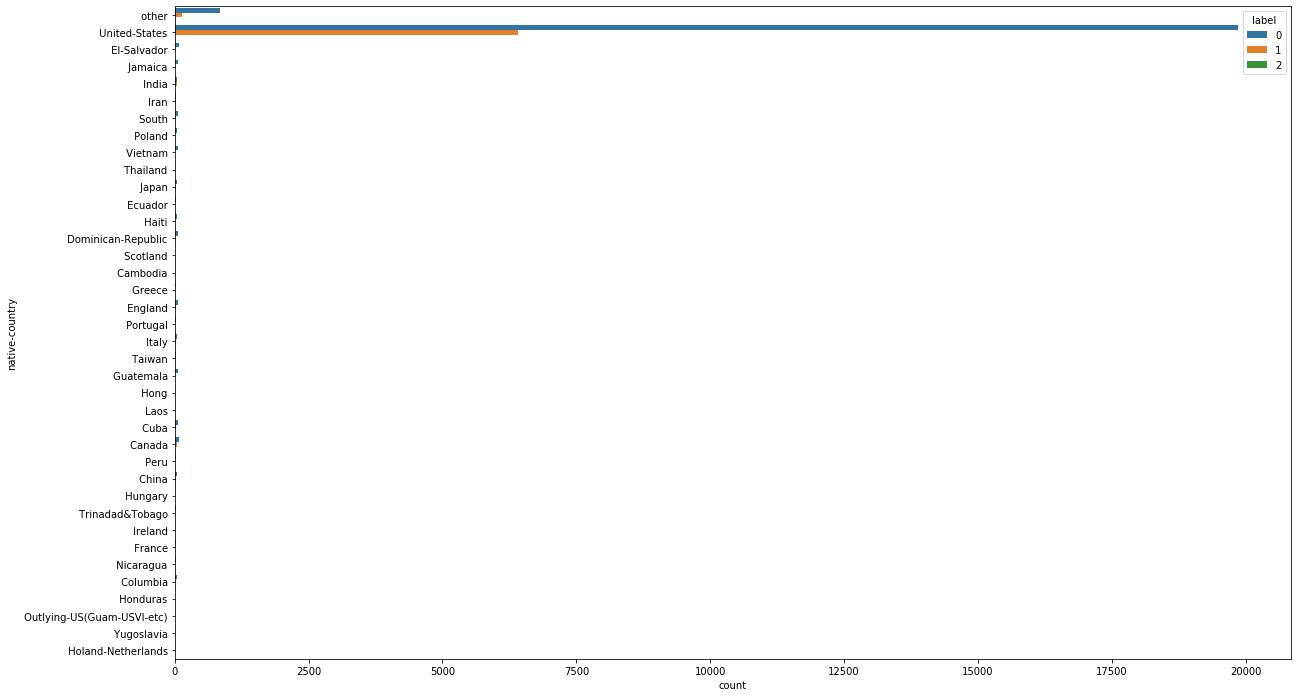

In [42]:
countries = np.array(dataset['native-country'].unique())
countries = np.delete(countries,0)
dataset['native-country'].replace([' Mexico', ' Philippines', ' Germany', ' Puerto-Rico', 'Canada', 'El-Salvador', 'India', 'Cuba', 'England','South', 'Jamaica', 'Italy', 'China', 'Guatemala', 'Dominican-Republic', 'Vietnam', 'Japan', 'Columbia', 'Poland', 'Haiti', 'Taiwan', 'Iran', 'Nicaragua', 'Portugal', 'Greece', 'Peru', 'France', 'Ecuador', 'Ireland', 'Hong', 'Trinadad&Tobago', 'Thailand', 'Cambodia', 'Laos', 'Outlying-US(Guam-USVI-etc)', 'Yugoslavia', 'Hungary', 'Scotland', 'Honduras', 'Holand-Netherlands', 'native-country' ],' other', inplace = True)
sns.countplot(y = 'native-country', hue = 'label', data = dataset)

In [44]:
#Separam coloanele pentru fiecare feature cu valori unuce in dataset !
y = dataset['label']
X = dataset.drop(['label'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 104


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [46]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [48]:

classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []


In [ ]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.64


In [ ]:
#Am testat performanta, iar GradientBoostingClasifier a avut cea mai buna performanta in F1.

from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

In [ ]:
#making individual predictions
def make_ind_prediction(new_data):
    data= new_data.values.reshape(1,-1)
    data= robust_scaler.transform(data)
    prob= logistic_regression.predict_proba(data)[0][1]
    if (prob>=0.35):
        return '>50K'
    else:
        return '<=50K'

